# Sui_Wenyu_HW4_report

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from IPython.display import display

## 1. Optimization

### 1.1

$$\begin{equation}
\begin{aligned}
\frac{\partial l(\theta)}{\partial \theta} & = \sum_{i=1}^m \{ \frac{\partial [-log(1+e^{-\theta^T x^i})]}{\partial [1+e^{-\theta^T x^i}]} \times 
\frac{\partial [1+e^{-\theta^T x^i}]}{\partial [- \theta^T x^i]}  \times \frac{\partial [- \theta^T x^i]}{\partial \theta} + \frac{\partial (y^i-1) \theta^T x^i}{\theta}\} \\
& = \sum_{i=1}^m\{ \frac{e^{- \theta^T x^i}x^i}{1+e^{-\theta^T x^i}}  + (y^i -1)x^i\} \\
& = \sum_{i=1}^m \frac{x^ie^{- \theta^T x^i}}{1+e^{-\theta^T x^i}}  + \sum_{i=1}^m (y^i -1)x^i
\end{aligned}
\end{equation}$$

### 1.2

**pseudo-code:**

initialize $\theta_0$ <br>
set $\epsilon$ to be a very small float value <br>
$t = 0$ 
<br><br>
while $(t=0)$ or $||\theta_{t} - \theta_{t-1}|| >  \epsilon$ do: 

&emsp;&emsp; set up step size $\gamma_t$ 

&emsp;&emsp; $\nabla l(\theta_{t}) = \sum_{i=1}^m \frac{x^i e^{- \theta_{t}^T x^i}}{1+e^{-\theta_{t}^T x^i}}  + \sum_{i=1}^m (y^i -1)x^i$ 

&emsp;&emsp; $\theta_{t+1} = \theta_{t} - \gamma_t \nabla l(\theta_{t})$ 

&emsp;&emsp; $t = t+1$


### 1.3

**pseudo-code:**

initialize $\theta_0$ <br>
set $\epsilon$ to be a very small float value <br>
$t = 0$ 
<br><br>
while $(t=0)$ or $||\theta_{t} - \theta_{t-1}|| >  \epsilon$ do: 

&emsp;&emsp; set up step size $\gamma_t$ 

&emsp;&emsp; randomly select a small subset $S_t$ data points $(x_i, y_i), i \in S_t$

&emsp;&emsp; $\nabla \hat{l}(\theta_{t}) = \sum_{i \in S_t} \frac{x^i e^{- \theta_{t}^T x^i}}{1+e^{-\theta_{t}^T x^i}}  + \sum_{i \in S_t} (y^i -1)x^i$ 

&emsp;&emsp; $\theta_{t+1} = \theta_{t} - \gamma_t \nabla \hat{l}(\theta_{t})$ 

&emsp;&emsp; $t = t+1$


**Difference between gradient descent and stochastic gradient descent:**

1. In gradient descent, we need to sum over all data points in the dataset to compute the gradient at each iteration.
2. In stochastics gradient descent, we randomly sample a small subset of the data points at each iteration. Then we estimate the gradient using the small subset of data points we selected.

### 1.4

The second derivative of $l(\theta)$ is:

$$\begin{equation}
\begin{aligned}
\frac{\partial^2 l(\theta)}{d\theta^2} & = \sum_{i=1}^m\frac{[1+ e^{-\theta^T x^i}][x^i e^{-\theta^T x^i}]' - [x^i e^{-\theta^T x^i}][1+ e^{-\theta^T x^i}]'}{[1+ e^{-\theta^T x^i}]^2} \\
& = \sum_{i=1}^m \frac{[1+ e^{-\theta^T x^i}][- (x^i)^2 e^{- \theta^T x^i}]}{[1+ e^{-\theta^T x^i}]^2}
+ \sum_{i=1}^m \frac{(x^i)^2 e^{-2 \theta^T x^i}}{[1+ e^{-\theta^T x^i}]^2} \\
&  = \sum_{i-1}^m \frac{- (x^i)^2 e^{-\theta^T x^i}}{[1+ e^{-\theta^T x^i}]^2} 
\end{aligned}
\end{equation}
$$

It can be easily seen from the equation above that $\frac{\partial^2 l(\theta)}{d\theta^2} < 0$. <br>
Therefore, the function $l(\theta)$ is concave, which means there is a single global optimum solution to find the maximum value of $l(\theta)$.

When we train the model, if we can find a optimal solution using gradient descent algorithm, this solution must be the global optimum solution.

## 2. Naive Bayes for spam filtering

### 2.1

The feature vector of each message is displayed as below. Also,

$$P(y=0) = \frac{3}{7}$$


$$P(y=1) = \frac{4}{7}$$

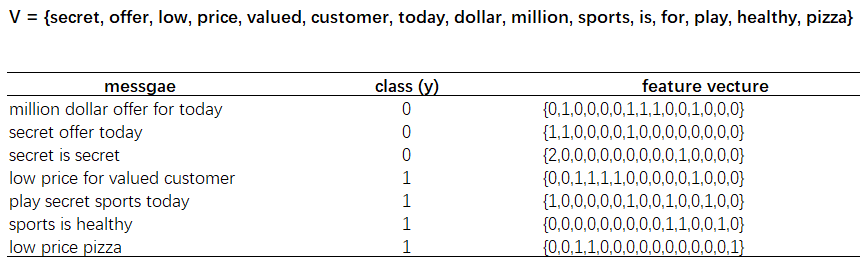

### 2.2

We are trying to maximize the following log-likelihood funcion: 

$$L(\theta_{c,k}, c=0,1,k=1,2...15)= \sum_{i=1}^{7} \sum_{k=1}^{15} x_k^{(i)} log \theta_{y^(i),k}$$

Since we know $\sum_{k=1}^{15}\theta_{c,k} = 1, c = \{0,1\}$

Therefore, we have two constraints for the log-likelihood function:
$$\sum_{k=1}^{15}\theta_{0,k} -1 = 0$$
$$\sum_{k=1}^{15}\theta_{1,k} -1 = 0$$

If we introduce Lagrangian multipliers, the function above can be written as
$$L(\theta_{c,k},\lambda_1, \lambda_2, c=\{0,1\}, k= 1...15)= \sum_{i=1}^{7} \sum_{k=1}^{15} x_k^{(i)} log \theta_{y^(i),k}+\lambda_1(\sum_{k=1}^{15}\theta_{0,k} -1) + \lambda_2(\sum_{k=1}^{15}\theta_{1,k} -1)$$



<br><br>

Since 

$y^{(i)} =0$ when $i = 1,2,3$        and <br>
$y^{(i)} =1$ when $i = 4,5,6,7$ 

we can get<br>
$$L(\theta_{c,k},\lambda_1, \lambda_2, c=\{0,1\}, k= 1...15)= \sum_{i=1}^{3} \sum_{k=1}^{15} x_k^{(i)} log \theta_{0,k} + 
\sum_{i=4}^{7} \sum_{k=1}^{15} x_k^{(i)} log \theta_{1,k} +
\lambda_1(\sum_{k=1}^{15}\theta_{0,k} -1)  + \lambda_2(\sum_{k=1}^{15}\theta_{1,k} -1)$$

Therefore, we have

$\frac{\partial L(\theta_{c,k},\lambda_1, \lambda_2)}{\partial \theta_{0,k}} = \frac{x_k^{(1)}+x_k^{(2)}+x_k^{(3)}}{\theta_{0,k}} + \lambda_1 
\space\space\space\space\space\space $ *for any integer $k$ between 1...15*

Since $L(\theta_{c,k},\lambda_1, \lambda_2, c=\{0,1\}, k= 1...15)$ needs to be maximized, we set

$\frac{\partial L(\theta_{c,k},\lambda_1, \lambda_2)}{\partial \theta_{0,k}} = \frac{x_k^{(1)}+x_k^{(2)}+x_k^{(3)}}{\theta_{0,k}} + \lambda_1 =0
\space\space\space\space\space\space$ *for any integer $k$ between 1...15*

Solving the equation above, we get

$\theta_{0,k} = -  \frac{x_k^{(1)}+x_k^{(2)}+x_k^{(3)}}{\lambda_1}$ *for any integer $k$ between 1...15*   &emsp;  &emsp; &emsp;   ***(2.2.1)***

<br><br>

Since we know,

$$\sum_{k=1}^{15}\theta_{0,k} -1 = 0$$

we can get

$$-  \frac{\sum_{k=1}^{15}x_k^{(1)}+x_k^{(2)}+x_k^{(3)}}{\lambda_1} = 1$$

Since $\sum_{k=1}^{15}x_k^{(1)}+x_k^{(2)}+x_k^{(3)} =11$ (the values are given in the feature vectors), we get $-\frac{11}{\lambda_1} = 1$

Therefore, $\lambda_1 = -11$

<br><br>

Using similar approach, we can get

$\theta_{1,k} = -  \frac{x_k^{(4)}+x_k^{(5)}+x_k^{(6)}+x_k^{(7)}}{\lambda_2}$ *for any integer $k$ between 1...15* &emsp;  &emsp; &emsp;   ***(2.2.2)***

We can also get $-  \frac{\sum_{k=1}^{15}x_k^{(4)}+x_k^{(5)}+x_k^{(6)}+x_k^{(7)}}{\lambda_2} = 1$

Therefore, $\lambda_2 = -15$

<br><br>

Plugging $k=1,7,1,15$, $\lambda_1 = -11$ and $\lambda_2 = -15$ into equation ***(2.2.1)*** and ***(2.2.2)***, we can get the following values:

$$\theta_{0,1} = \frac{3}{11}$$

$$\theta_{0,7} = \frac{2}{11}$$

$$\theta_{1,1} = \frac{1}{15}$$

$$\theta_{1,15} = \frac{1}{15}$$

### 2.3

The feature vector of the message "**today is secret**" is displayed as below:
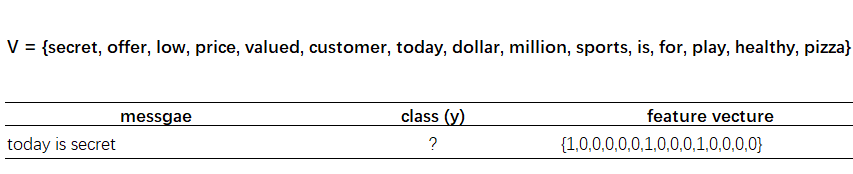

Set $x  = "today \space is \space secret"$.

The probability that this message is spam can be written as

$$
\begin{equation}
\begin{aligned}
P(y=0 | x) & = \frac{P(y=0, x)}{P(x)} \\
& = \frac{P(y=0)P(x|y=0)}{P(y=0)P(x|y=0)+P(y=1)P(x|y=1)} \\
& = \frac{\frac{3}{7}P(x|y=0)}{\frac{3}{7}P(x|y=0) +\frac{4}{7}P(x|y=1)}
\end{aligned}
\end{equation}$$

Since

$$
\begin{equation}
\begin{aligned}
P(x|y=0) & = \frac{n!}{x_1!...x_{15}! } \prod_{k=1}^{15} \theta_{0,k}^{x_k} \\
& = 3! \times \theta_{0,1}^1 \times \theta_{0,7}^1 \times \theta_{0,11}^1 \\
& = 6 \times \frac{3}{11} \times \frac{2}{11} \times \frac{1}{11} \\
& \approx 0.027047
\end{aligned}
\end{equation}$$

$$
\begin{equation}
\begin{aligned}
P(x|y=1) & = \frac{n!}{x_1!...x_{15}! } \prod_{k=1}^{15} \theta_{1,k}^{x_k} \\
& = 3! \times \theta_{1,1}^1 \times \theta_{1,7}^1 \times \theta_{1,11}^1 \\
& = 6 \times \frac{1}{15} \times \frac{1}{15} \times \frac{1}{15} \\
& \approx 0.001778
\end{aligned}
\end{equation}$$

Therefore,

$$
\begin{equation}
\begin{aligned}
P(y=0 | x) & = \frac{P(y=0, x)}{P(x)} \\
& = \frac{\frac{3}{7}P(x|y=0)}{\frac{3}{7}P(x|y=0) +\frac{4}{7}P(x|y=1)}\\
& = \frac{\frac{3}{7} \times 0.027047}{\frac{3}{7} \times 0.027047 + \frac{4}{7} \times 0.001778} \approx 91.94\%
\end{aligned}
\end{equation}$$


Similarly, we can get

$$
\begin{equation}
\begin{aligned}
P(y=1 | x) & = \frac{P(y=1, x)}{P(x)} \\
& = \frac{\frac{4}{7}P(x|y=1)}{\frac{3}{7}P(x|y=0) +\frac{4}{7}P(x|y=1)}\\
& = \frac{\frac{4}{7} \times 0.001778}{\frac{3}{7} \times 0.027047 + \frac{4}{7} \times 0.001778} \approx 8.06\%
\end{aligned}
\end{equation}$$

Since $P(y=0 | x) > P(y=1 | x)  $, this message is a spam.

## 3. Comparing classifiers: Divorce classification/prediction

### 3.1

In the following code chunk, we use the first 80% data for training and the remaining 20% for testing.  We compare the testing accuracy of  **Naive Bayes**, **Logistic Regression** and **KNN**. For the KNN model, we set $k = 3$.

We can see from the result that **Naive Bayes** and **KNN** achieve testing accuracy of 100%.  **Logistic Regression** achieves testing accuracy of 85.29%. Therefore, **Naive Bayes** and **KNN** are performing the best in this scenario. Here are some potential reasons why these two models are performing the best:

1.  Non-linear decision boundary may be more appropriate for this dataset. **Naive Bayes** and **KNN** could apply a non-linear decision boundary, while **Logistic Regression** can only apply a linear decision boundary.
<br><br>
2. Since we use the first 80% of data as training and the rest 20% as testing, the training & testing datasets are not randomly split from the original data. (And we also didn't use cross validation.) Therefore,  it's possible that **Naive Bayes** and **KNN**  perform better than **Logistic Regression**  becuase of overfitting.

In [2]:
# read data
divorce = pd.read_csv('data\marriage.csv', header = None)
X = np.array(divorce)[:, 0:-1]
Y = np.array(divorce)[:, -1]

# split data into train and test
# use the first 80% data for training and the remaining 20% for testing
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2,
                                                #random_state = 2
                                                shuffle = False
                                                )

names = ["Naive Bayes", "Logistic Regression", "KNN"]

classifiers = [GaussianNB(),
               LogisticRegression(max_iter=200, solver = 'liblinear').fit(xtrain, ytrain),
               KNeighborsClassifier(3)]

# compare the performance of different classifiers
for name, clf in zip(names, classifiers):

    # fit the model
    model = clf.fit(xtrain, ytrain)

    # calculate testing accuracy
    # ## test error
    ypred_test = clf.predict(xtest)
    matched_test = ypred_test == ytest
    acc_test = sum(matched_test) / len(matched_test)

    print("Testing Accuracy of ", name, ":", round(acc_test,4))

Testing Accuracy of  Naive Bayes : 1.0
Testing Accuracy of  Logistic Regression : 0.8529
Testing Accuracy of  KNN : 1.0


### 3.2

The first code chunk below displays the two-dimensional PCA result in a scatter plot. Each data point is marked with its own orginal label.
The second code chunk displays the decision boundaries of  **Naive Bayes**, **Logistic Regression** and **KNN**.

From the figures in the second chunk, it can be observed that the decision boundary of logistioc regression is linear, while the decision boundaries of KNN and Naive Bayes are both non-linear. Also, KNN has the most irregular and noisy decision boundary among these three models.

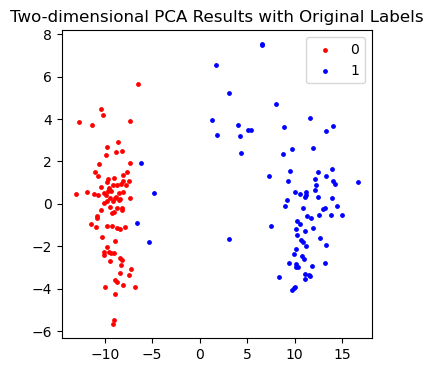

In [3]:
# perform PCA to the origianl dataset
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# display data points with original labels
plt.figure(figsize = (4,4))
plt.title("Two-dimensional PCA Results with Original Labels")

idx = np.where(Y == 0)[0]
plt.scatter(X_r[idx, 0], X_r[idx, 1], c='#FF0000', label = 0, s = 6)

idx = np.where(Y == 1)[0]
plt.scatter(X_r[idx, 0], X_r[idx, 1], c='#0000FF', label = 1, s = 6)

plt.legend(loc = "best")
plt.show()

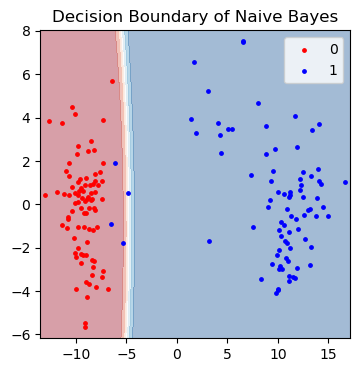

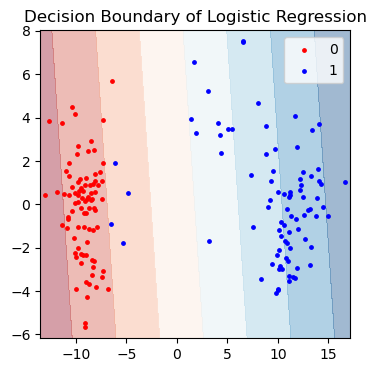

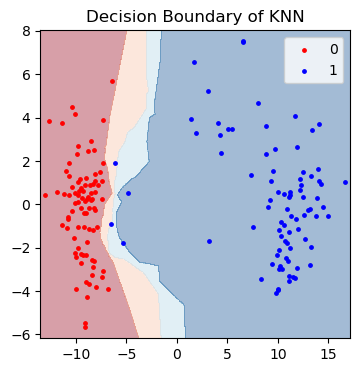

In [4]:
# create coordinate for the contour plot
h = .02
x_min, x_max = X_r[:, 0].min() - .5, X_r[:, 0].max() + .5
y_min, y_max = X_r[:, 1].min() - .5, X_r[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

for name, clf in zip(names, classifiers):
    clf.fit(X_r, Y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    plt.figure(figsize = (4,4))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.4)

    # display data points with original labels
    idx = np.where(Y == 0)[0]
    plt.scatter(X_r[idx, 0], X_r[idx, 1], c='#FF0000', label = 0, s= 6)

    idx = np.where(Y == 1)[0]
    plt.scatter(X_r[idx, 0], X_r[idx, 1], c='#0000FF', label = 1, s = 6)

    plt.legend(loc="best")
    plt.title("Decision Boundary of " + name)
    plt.show()